In [ ]:
# First, manually select: Runtime > Change runtime type > Hardware accelerator > GPU
# Then run this cell to verify GPU
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.18.0
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Clone the repository (downloads all data)
!git clone https://github.com/pratikkayal/PlantDoc-Dataset.git

!ls -la PlantDoc-Dataset/

# Install dependencies
!pip install -q matplotlib seaborn scikit-learn

Cloning into 'PlantDoc-Dataset'...
remote: Enumerating objects: 2670, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 2670 (delta 22), reused 22 (delta 22), pack-reused 2635 (from 1)
Receiving objects: 100% (2670/2670), 932.92 MiB | 23.30 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (2581/2581), done.
total 728
drwxr-xr-x  5 root root   4096 Mar 19 02:20 .
drwxr-xr-x  1 root root   4096 Mar 19 02:19 ..
drwxr-xr-x  8 root root   4096 Mar 19 02:20 .git
-rw-r--r--  1 root root  18649 Mar 19 02:20 LICENSE.txt
-rw-r--r--  1 root root 700316 Mar 19 02:20 PlantDoc_Examples.png
-rw-r--r--  1 root root   2687 Mar 19 02:20 README.md
drwxr-xr-x 29 root root   4096 Mar 19 02:20 test
drwxr-xr-x 30 root root   4096 Mar 19 02:20 train


MODEL:

Created mapping file with 38 plant disease classes
❌ Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/PlantDiseaseProject/model/plant_disease_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Please upload your model file:


Saving plant_disease_model.h5 to plant_disease_model.h5


✅ Model loaded from uploaded file: plant_disease_model.h5

🌿 PLANT DISEASE DETECTION TOOL 🌿
Upload a photo of a plant leaf to diagnose diseases
Supported formats: JPG, JPEG, PNG


Please upload a plant image:


Saving 11.jpg to 11 (2).jpg

Analyzing: 11 (2).jpg


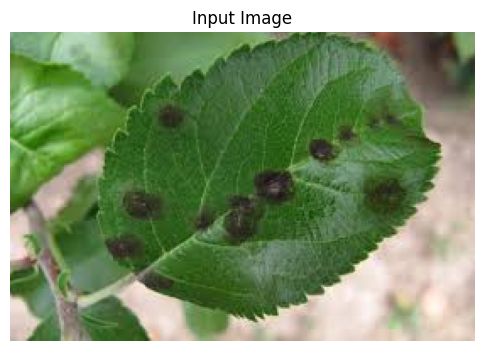

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step

🌿 PLANT DISEASE DETECTION RESULTS 🌿
PRIMARY DIAGNOSIS: Grape_leaf_blight
CONFIDENCE: 23.17%
Top 3 Predictions:
1. Grape_leaf_blight: 23.17%
2. Peach_bacterial_spot: 17.45%
3. Apple_cedar_apple_rust: 16.67%


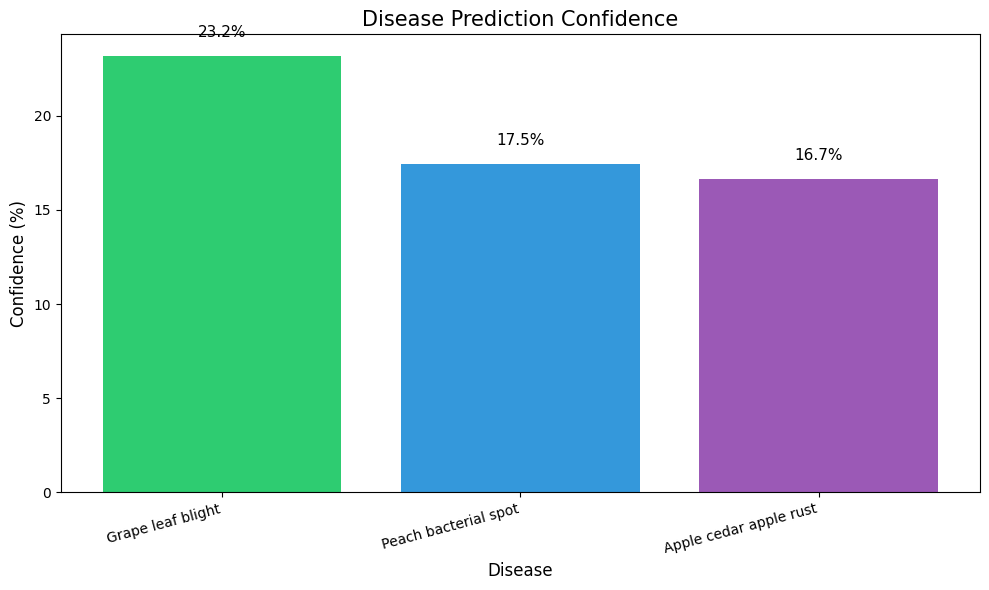


🔍 TREATMENT RECOMMENDATIONS:
• Consult with a local agricultural extension for specific treatment options
• Remove infected plant material
• Consider appropriate fungicides or bactericides based on the specific disease


In [ ]:
from google.colab import files
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Create necessary directories
os.makedirs('/content/drive/MyDrive/PlantDiseaseProject', exist_ok=True)

# 1. MANUAL CLASS MAPPING
# Create a comprehensive mapping of plant diseases (adjust according to your model)
class_mapping = {
    0: "Apple_scab",
    1: "Apple_black_rot",
    2: "Apple_cedar_apple_rust",
    3: "Apple_healthy",
    4: "Blueberry_healthy",
    5: "Cherry_powdery_mildew",
    6: "Cherry_healthy",
    7: "Corn_cercospora_leaf_spot",
    8: "Corn_common_rust",
    9: "Corn_northern_leaf_blight",
    10: "Corn_healthy",
    11: "Grape_black_rot",
    12: "Grape_esca_black_measles",
    13: "Grape_leaf_blight",
    14: "Grape_healthy",
    15: "Orange_haunglongbing",
    16: "Peach_bacterial_spot",
    17: "Peach_healthy",
    18: "Pepper_bacterial_spot",
    19: "Pepper_healthy",
    20: "Potato_early_blight",
    21: "Potato_late_blight",
    22: "Potato_healthy",
    23: "Raspberry_healthy",
    24: "Soybean_healthy",
    25: "Squash_powdery_mildew",
    26: "Strawberry_leaf_scorch",
    27: "Strawberry_healthy",
    28: "Tomato_bacterial_spot",
    29: "Tomato_early_blight",
    30: "Tomato_late_blight",
    31: "Tomato_leaf_mold",
    32: "Tomato_septoria_leaf_spot",
    33: "Tomato_spider_mites",
    34: "Tomato_target_spot",
    35: "Tomato_yellow_leaf_curl_virus",
    36: "Tomato_mosaic_virus",
    37: "Tomato_healthy"
}

# Save the class mapping to file
with open('/content/drive/MyDrive/PlantDiseaseProject/class_indices.txt', 'w') as f:
    for idx, name in class_mapping.items():
        f.write(f"{name}: {idx}\n")
print(f"Created mapping file with {len(class_mapping)} plant disease classes")

# 2. LOAD YOUR MODEL
MODEL_PATH = '/content/drive/MyDrive/PlantDiseaseProject/model/plant_disease_model.h5'
IMAGE_SIZE = 224  # UPDATED to 224x224 based on your model's requirements

try:
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("\nPlease upload your model file:")
    uploaded_model = files.upload()

    for filename in uploaded_model.keys():
        if filename.endswith('.h5'):
            os.makedirs('/content/drive/MyDrive/PlantDiseaseProject/model', exist_ok=True)
            model_path = f'/content/drive/MyDrive/PlantDiseaseProject/model/{filename}'
            with open(model_path, 'wb') as f:
                f.write(uploaded_model[filename])
            model = load_model(model_path)
            print(f"✅ Model loaded from uploaded file: {filename}")

# 3. DISEASE DETECTION FUNCTION
def detect_disease(image_path):
    try:
        # Load and display the image
        img = Image.open(image_path).convert('RGB')
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title("Input Image")
        plt.axis('off')
        plt.show()

        # Preprocess for prediction
        img_resized = img.resize((IMAGE_SIZE, IMAGE_SIZE))
        img_array = image.img_to_array(img_resized)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)

        # Make prediction
        predictions = model.predict(img_array)

        # Get top 3 predictions
        top_indices = np.argsort(predictions[0])[-3:][::-1]
        top_predictions = [
            (class_mapping.get(idx, f"Unknown Class {idx}"), float(predictions[0][idx] * 100))
            for idx in top_indices
        ]

        # Display results
        print("\n🌿 PLANT DISEASE DETECTION RESULTS 🌿")
        print("=" * 45)
        print(f"PRIMARY DIAGNOSIS: {top_predictions[0][0]}")
        print(f"CONFIDENCE: {top_predictions[0][1]:.2f}%")
        print("=" * 45)
        print("Top 3 Predictions:")
        for i, (disease, confidence) in enumerate(top_predictions, 1):
            print(f"{i}. {disease}: {confidence:.2f}%")

        # Create a bar chart
        plt.figure(figsize=(10, 6))
        diseases = [p[0].replace('_', ' ') for p in top_predictions]
        confidences = [p[1] for p in top_predictions]

        bars = plt.bar(range(len(diseases)), confidences, color=['#2ecc71', '#3498db', '#9b59b6'])
        plt.title('Disease Prediction Confidence', fontsize=15)
        plt.xlabel('Disease', fontsize=12)
        plt.ylabel('Confidence (%)', fontsize=12)
        plt.xticks(range(len(diseases)), diseases, rotation=15, ha='right')

        # Add percentage labels on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', fontsize=11)

        plt.tight_layout()
        plt.show()

        return top_predictions[0][0]  # Return the top prediction

    except Exception as e:
        print(f"Error during detection: {e}")
        return None

# 4. INTERACTIVE INTERFACE
def run_detection_tool():
    print("\n" + "=" * 50)
    print("🌿 PLANT DISEASE DETECTION TOOL 🌿")
    print("=" * 50)
    print("Upload a photo of a plant leaf to diagnose diseases")
    print("Supported formats: JPG, JPEG, PNG")
    print("=" * 50 + "\n")

    while True:
        print("\nPlease upload a plant image:")
        uploaded = files.upload()

        if not uploaded:
            print("No files uploaded. Try again.")
            continue

        for filename in uploaded.keys():
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                print(f"\nAnalyzing: {filename}")
                diagnosis = detect_disease(filename)

                if diagnosis:
                    # Add treatment recommendations based on the diagnosis
                    treatment_info = {
                        "Apple_scab": "• Apply fungicides early in the season\n• Prune and dispose of infected leaves\n• Ensure good air circulation",
                        "Apple_black_rot": "• Remove mummified fruits\n• Prune out dead or infected wood\n• Apply appropriate fungicides",
                        "Tomato_early_blight": "• Remove infected leaves\n• Apply fungicides labeled for early blight\n• Maintain adequate plant spacing",
                        "Tomato_late_blight": "• Remove infected plants immediately\n• Apply copper-based fungicides\n• Avoid overhead watering"
                    }

                    print("\n🔍 TREATMENT RECOMMENDATIONS:")
                    print(treatment_info.get(diagnosis, "• Consult with a local agricultural extension for specific treatment options\n• Remove infected plant material\n• Consider appropriate fungicides or bactericides based on the specific disease"))
            else:
                print(f"'{filename}' is not a supported image format.")

        # Ask if user wants to analyze another image
        repeat = input("\nDo you want to analyze another image? (yes/no): ").strip().lower()
        if repeat != 'yes' and repeat != 'y':
            print("\nThank you for using the Plant Disease Detection Tool!")
            break

# 5. RUN THE DETECTION TOOL
run_detection_tool()

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import time
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files, drive

print("\n" + "="*50)
print("🌿 PLANT DISEASE MODEL EVALUATION DASHBOARD 🌿")
print("="*50 + "\n")

# 1. Mount Google Drive (if not already mounted)
try:
    drive.mount('/content/drive')
    print("Google Drive mounted successfully")
except:
    print("Drive already mounted or couldn't be mounted")

# 2. Create project directories
os.makedirs('/content/drive/MyDrive/PlantDiseaseProject/model', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PlantDiseaseProject/evaluation', exist_ok=True)

# 3. Check for model and upload if necessary
MODEL_PATH = '/content/drive/MyDrive/PlantDiseaseProject/model/plant_disease_model.h5'
if not os.path.exists(MODEL_PATH):
    print("Model file not found at the expected location.")
    print("Please upload your model file (.h5):")
    uploaded = files.upload()

    for filename in uploaded.keys():
        if filename.endswith('.h5'):
            # Save the model to the expected location
            with open(MODEL_PATH, 'wb') as f:
                f.write(uploaded[filename])
            print(f"Model saved to {MODEL_PATH}")

# 4. Load the model
try:
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please make sure your model file is a valid Keras model.")
    raise

# 5. Get model information
IMAGE_SIZE = model.input_shape[1:3]  # Extract input shape from model
print(f"Model expects input images of size: {IMAGE_SIZE[0]}x{IMAGE_SIZE[1]}")

# 6. Get or specify PlantDoc dataset location
print("\nWhere is your PlantDoc dataset located?")
print("1. In Google Drive")
print("2. I need to download it now")
print("3. In /content (already downloaded)")

dataset_choice = input("Enter your choice (1, 2, or 3): ")

if dataset_choice == "1":
    DATASET_PATH = input("Enter the path to your dataset in Google Drive (e.g., /content/drive/MyDrive/PlantDoc_Dataset): ")
elif dataset_choice == "2":
    print("Downloading PlantDoc dataset...")
    !git clone https://github.com/pratikkayal/PlantDoc-Dataset.git

    # Check the actual structure of the downloaded repository
    print("\nExploring repository structure...")
    !ls -la PlantDoc-Dataset

    # Try different possible paths
    possible_paths = [
        "/content/PlantDoc-Dataset/PlantDoc_Dataset",
        "/content/PlantDoc-Dataset/Dataset",
        "/content/PlantDoc-Dataset"
    ]

    DATASET_PATH = None
    for path in possible_paths:
        if os.path.exists(path):
            # Check if it contains subdirectories that might be classes
            subdirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
            if subdirs:
                print(f"Found potential dataset at: {path}")
                print(f"It contains {len(subdirs)} subdirectories: {subdirs[:5]}...")
                use_path = input(f"Use this path? (y/n): ")
                if use_path.lower() == 'y':
                    DATASET_PATH = path
                    break

    if DATASET_PATH is None:
        print("Could not automatically find the dataset directory.")
        DATASET_PATH = input("Please enter the correct path to the dataset: ")
else:
    # Option 3 or default
    DATASET_PATH = "/content/PlantDoc_Dataset"
    if not os.path.exists(DATASET_PATH):
        print(f"Dataset not found at {DATASET_PATH}. Checking alternative locations...")

        # Check various possible locations
        possible_paths = [
            "/content/PlantDoc-Dataset/PlantDoc_Dataset",
            "/content/PlantDoc-Dataset/Dataset",
            "/content/PlantDoc-Dataset"
        ]

        for path in possible_paths:
            if os.path.exists(path):
                subdirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
                if subdirs:
                    print(f"Found potential dataset at: {path}")
                    print(f"It contains {len(subdirs)} subdirectories: {subdirs[:5]}...")
                    use_path = input(f"Use this path? (y/n): ")
                    if use_path.lower() == 'y':
                        DATASET_PATH = path
                        break

        if DATASET_PATH == "/content/PlantDoc_Dataset":  # If path wasn't updated
            print("Dataset not found. Downloading it now...")
            !git clone https://github.com/pratikkayal/PlantDoc-Dataset.git

            # Check the repository structure
            print("\nExploring repository structure...")
            !ls -la PlantDoc-Dataset

            DATASET_PATH = input("Please enter the correct path to the dataset: ")

print(f"\nUsing dataset at: {DATASET_PATH}")

# 7. Create class mapping from dataset
def get_class_mapping_from_dataset():
    print("Creating class mapping from dataset directories...")
    try:
        class_names = sorted([d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))])
        if not class_names:
            print("Warning: No subdirectories found in the dataset path. This doesn't look like a valid dataset.")
            print("Subdirectories should represent disease classes.")

            # List what's in the directory to help debug
            print(f"Contents of {DATASET_PATH}:")
            !ls -la {DATASET_PATH}

            return None

        class_indices = {i: name for i, name in enumerate(class_names)}

        # Save mapping to file
        with open('/content/drive/MyDrive/PlantDiseaseProject/class_indices.txt', 'w') as f:
            for idx, name in class_indices.items():
                f.write(f"{name}: {idx}\n")

        print(f"Found {len(class_indices)} classes in the dataset")
        return class_indices
    except Exception as e:
        print(f"Error creating class mapping: {e}")
        return None

class_mapping = get_class_mapping_from_dataset()
if class_mapping is None:
    print("Could not create class mapping from the dataset.")
    print("Please manually specify the classes:")

    # Create a simple default mapping
    class_mapping = {
        0: "Apple_scab",
        1: "Apple_black_rot",
        2: "Apple_cedar_apple_rust",
        3: "Apple_healthy",
        4: "Blueberry_healthy",
        5: "Cherry_powdery_mildew",
        6: "Cherry_healthy",
        7: "Corn_cercospora_leaf_spot",
        8: "Corn_common_rust",
        9: "Corn_northern_leaf_blight",
        10: "Corn_healthy"
    }

    # Save this mapping
    with open('/content/drive/MyDrive/PlantDiseaseProject/class_indices.txt', 'w') as f:
        for idx, name in class_mapping.items():
            f.write(f"{name}: {idx}\n")

    print(f"Created default mapping with {len(class_mapping)} classes")

# 8. Create test data generator
BATCH_SIZE = 32

print("\nPreparing dataset for evaluation...")
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

try:
    test_generator = test_datagen.flow_from_directory(
        DATASET_PATH,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
    )

    # 9. Evaluate model
    print("\nEvaluating model performance...")
    start_time = time.time()
    test_loss, test_acc = model.evaluate(test_generator)
    end_time = time.time()

    inference_time = end_time - start_time
    samples = test_generator.samples

    print(f"\n===== MODEL PERFORMANCE METRICS =====")
    print(f"Test Accuracy: {test_acc*100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Inference Time: {inference_time:.2f} seconds for {samples} samples")
    print(f"Average Inference Time: {(inference_time/samples)*1000:.2f} ms per sample")

    # 10. Generate confusion matrix
    print("\nGenerating confusion matrix...")
    test_generator.reset()
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes
    y_pred = y_pred[:len(y_true)]  # Ensure lengths match

    cm = confusion_matrix(y_true, y_pred)

    # Plot and save confusion matrix
    plt.figure(figsize=(16, 14))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[class_mapping.get(i, f"Class {i}") for i in range(len(class_mapping))],
                yticklabels=[class_mapping.get(i, f"Class {i}") for i in range(len(class_mapping))])
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/confusion_matrix.png', dpi=300)
    plt.show()

    # 11. Generate classification report
    class_names = [class_mapping.get(i, f"Class {i}") for i in range(len(class_mapping))]
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("\n===== CLASSIFICATION REPORT =====")
    print(report)

    # Save report to CSV
    report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df.to_csv('/content/drive/MyDrive/PlantDiseaseProject/evaluation/classification_report.csv')

    # 12. Analyze dataset distribution
    print("\nAnalyzing dataset distribution...")
    class_counts = {}
    for class_idx, class_name in class_mapping.items():
        class_dir = os.path.join(DATASET_PATH, class_name)
        if os.path.exists(class_dir):
            class_counts[class_name] = len([f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])

    # Sort by count
    class_counts = {k: v for k, v in sorted(class_counts.items(), key=lambda x: x[1], reverse=True)}

    # Plot and save class distribution
    plt.figure(figsize=(14, 8))
    bars = plt.bar(class_counts.keys(), class_counts.values())
    plt.title('Dataset Distribution Across Classes', fontsize=16)
    plt.xlabel('Disease Class', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=90)

    # Add count labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height}', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/dataset_distribution.png', dpi=300)
    plt.show()

    # 13. Show sample predictions
    print("\nDisplaying sample predictions...")
    test_generator.reset()
    images, labels = next(test_generator)
    predictions = model.predict(images)

    plt.figure(figsize=(15, 12))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i]/255.0)  # Normalize for display

        true_class = np.argmax(labels[i])
        pred_class = np.argmax(predictions[i])

        true_label = class_mapping.get(true_class, f"Class {true_class}")
        pred_label = class_mapping.get(pred_class, f"Class {pred_class}")
        confidence = predictions[i][pred_class] * 100

        title = f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%"
        plt.title(title, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/sample_predictions.png', dpi=300)
    plt.show()

    print("\n" + "="*50)
    print("EVALUATION COMPLETE!")
    print("All visualizations have been saved to your Google Drive:")
    print("/content/drive/MyDrive/PlantDiseaseProject/evaluation/")
    print("="*50)

except Exception as e:
    print(f"Error during evaluation: {e}")

    # Try to help with dataset structure issues
    print("\nAttempting to diagnose the dataset structure issue...")
    try:
        print(f"Contents of {DATASET_PATH}:")
        !ls -la {DATASET_PATH}

        # Check for common issues
        if os.path.exists(os.path.join(DATASET_PATH, 'train')):
            print("\nFound 'train' subdirectory - this dataset might have train/val/test splits.")
            print("Try using the 'train' directory instead:")
            print(f"  {os.path.join(DATASET_PATH, 'train')}")

        if os.path.exists(os.path.join(DATASET_PATH, 'PlantDoc_Dataset')):
            print("\nFound nested 'PlantDoc_Dataset' directory - try this path instead:")
            print(f"  {os.path.join(DATASET_PATH, 'PlantDoc_Dataset')}")
    except:
        print("Could not inspect the dataset directory structure.")


🌿 PLANT DISEASE MODEL EVALUATION DASHBOARD 🌿

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully


✅ Model loaded successfully
Model expects input images of size: 224x224

Where is your PlantDoc dataset located?
1. In Google Drive
2. I need to download it now
3. In /content (already downloaded)
Enter your choice (1, 2, or 3): 2
fatal: destination path 'PlantDoc-Dataset' already exists and is not an empty directory.

Exploring repository structure...
total 728
drwxr-xr-x  5 root root   4096 Mar 19 03:03 .
drwxr-xr-x  1 root root   4096 Mar 19 03:03 ..
drwxr-xr-x  8 root root   4096 Mar 19 03:04 .git
-rw-r--r--  1 root root  18649 Mar 19 03:03 LICENSE.txt
-rw-r--r--  1 root root 700316 Mar 19 03:03 PlantDoc_Examples.png
-rw-r--r--  1 root root   2687 Mar 19 03:03 README.md
drwxr-xr-x 29 root root   4096 Mar 19 03:03 test
drwxr-xr-x 30 root root   4096 Mar 19 03:04 train
Found potential dataset at: /content/PlantDoc-Dataset
It contains 3 subdirectories: ['.git', 'train', 'test']...
Use this path? (y/n): y

Using dataset at: /content/PlantDoc-Dataset
Creating class mapping from dataset 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Error during evaluation: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 3), output.shape=(None, 28)

Attempting to diagnose the dataset structure issue...
Contents of /content/PlantDoc-Dataset:
total 728
drwxr-xr-x  5 root root   4096 Mar 19 03:03 .
drwxr-xr-x  1 root root   4096 Mar 19 03:03 ..
drwxr-xr-x  8 root root   4096 Mar 19 03:04 .git
-rw-r--r--  1 root root  18649 Mar 19 03:03 LICENSE.txt
-rw-r--r--  1 root root 700316 Mar 19 03:03 PlantDoc_Examples.png
-rw-r--r--  1 root root   2687 Mar 19 03:03 README.md
drwxr-xr-x 29 root root   4096 Mar 19 03:03 test
drwxr-xr-x 30 root root   4096 Mar 19 03:04 train

Found 'train' subdirectory - this dataset might have train/val/test splits.
Try using the 'train' directory instead:
  /content/PlantDoc-Dataset/train



🌿 PLANT DISEASE MODEL EVALUATION DASHBOARD 🌿



✅ Model loaded successfully
Model expects input images of size: 224x224
Model predicts 28 different classes

Using training data from: /content/PlantDoc-Dataset/train
Using test data from: /content/PlantDoc-Dataset/test
Creating class mapping from dataset directories...
Found 28 classes in the training data

Preparing datasets for evaluation...
Found 2342 images belonging to 28 classes.
Found 236 images belonging to 27 classes.

Analyzing dataset distribution...


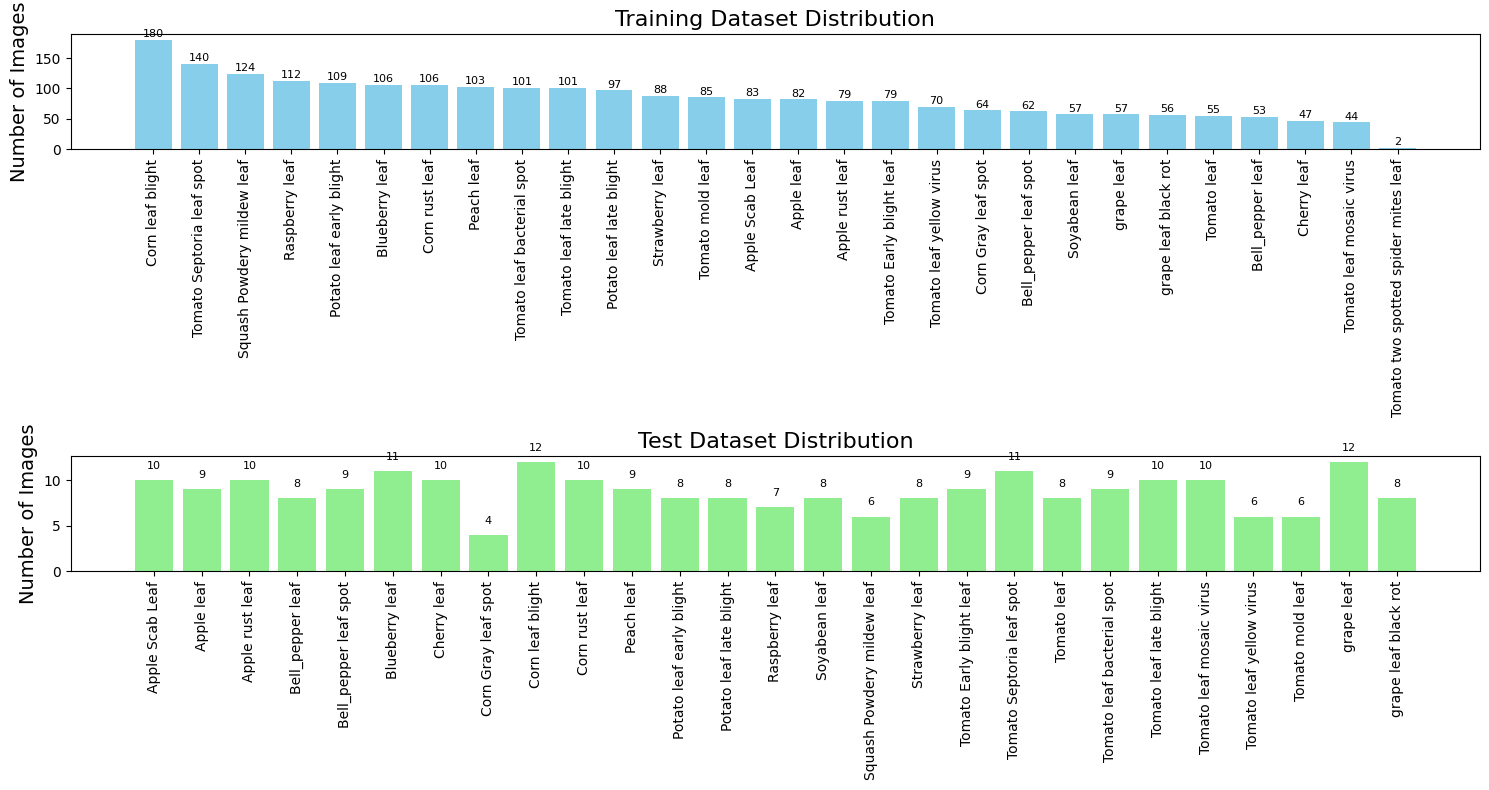


===== DATASET STATISTICS =====
Total training samples: 2342
Total test samples: 236
Training/Test split: 90.8%/9.2%

Evaluating model performance...
Error during evaluation: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 27), output.shape=(None, 28)

Possible issues:
1. The model was trained with different class indices than what we're using
2. The model expects a different preprocessing function
3. The input/output dimensions mismatch between model and dataset

Displaying sample predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


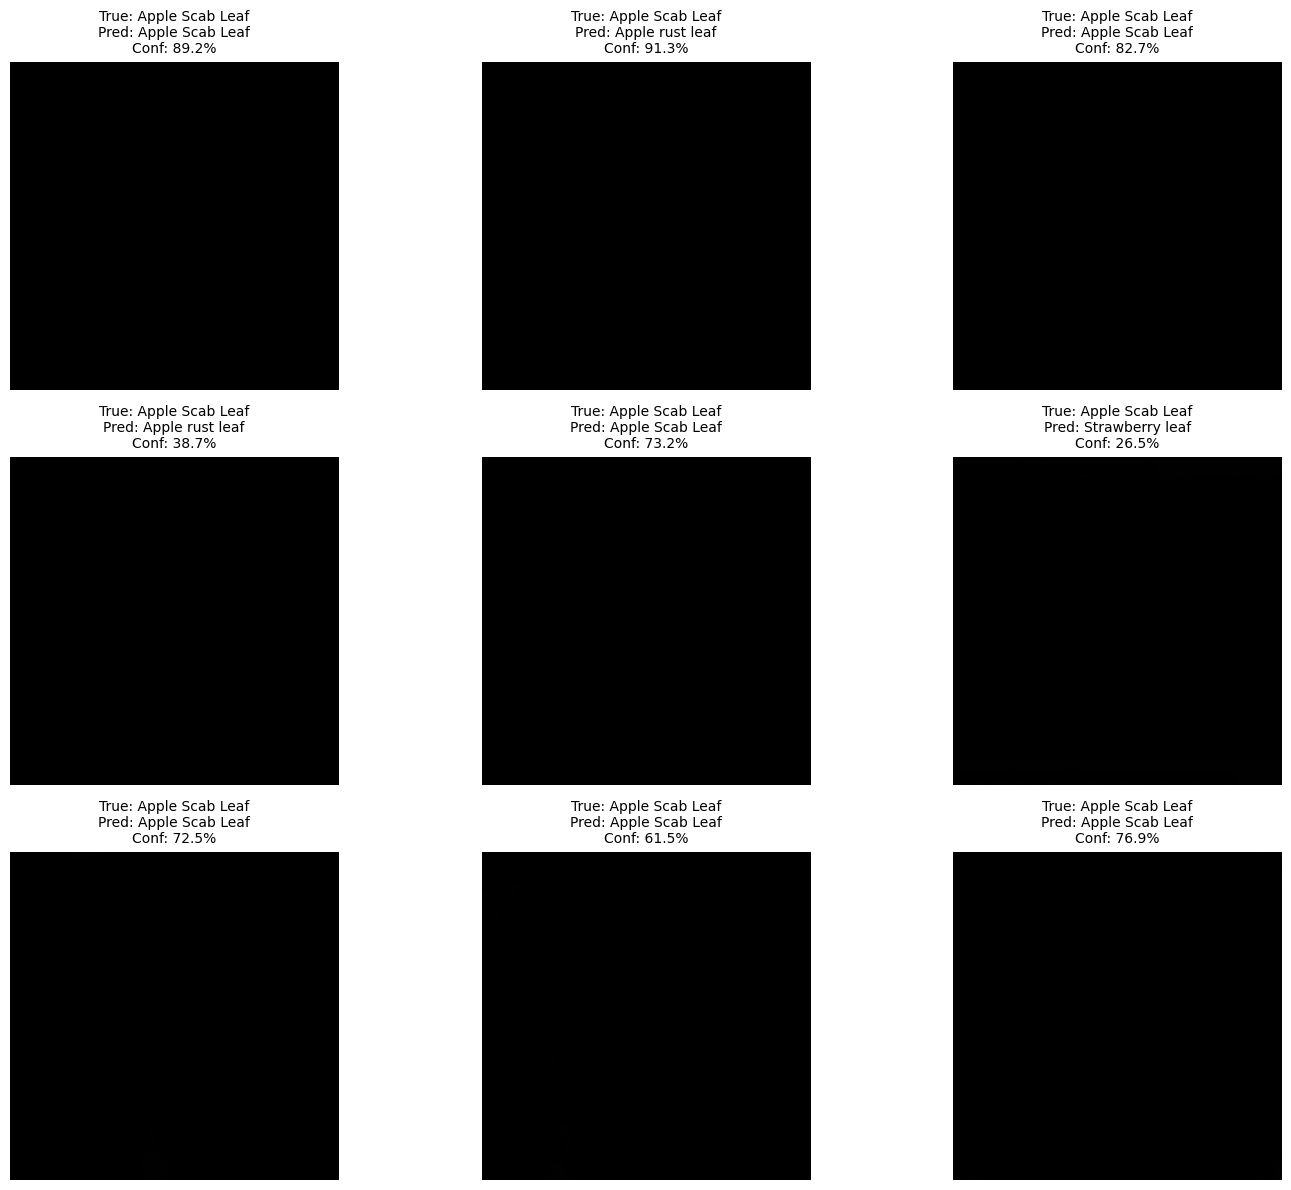


EVALUATION COMPLETE!
All visualizations have been saved to your Google Drive:
/content/drive/MyDrive/PlantDiseaseProject/evaluation/


In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import time
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files, drive

print("\n" + "="*50)
print("🌿 PLANT DISEASE MODEL EVALUATION DASHBOARD 🌿")
print("="*50 + "\n")

# 1. Create project directories
os.makedirs('/content/drive/MyDrive/PlantDiseaseProject/evaluation', exist_ok=True)

# 2. Load your model
MODEL_PATH = '/content/drive/MyDrive/PlantDiseaseProject/model/plant_disease_model.h5'
try:
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# 3. Get model information
IMAGE_SIZE = model.input_shape[1:3]  # Get input shape from model
print(f"Model expects input images of size: {IMAGE_SIZE[0]}x{IMAGE_SIZE[1]}")
NUM_CLASSES = model.output_shape[1]  # Get number of output classes
print(f"Model predicts {NUM_CLASSES} different classes")

# 4. Set dataset paths based on repository structure
TRAIN_PATH = "/content/PlantDoc-Dataset/train"
TEST_PATH = "/content/PlantDoc-Dataset/test"

print(f"\nUsing training data from: {TRAIN_PATH}")
print(f"Using test data from: {TEST_PATH}")

# 5. Create class mapping from train directory
def get_class_mapping():
    print("Creating class mapping from dataset directories...")
    class_names = sorted([d for d in os.listdir(TRAIN_PATH) if os.path.isdir(os.path.join(TRAIN_PATH, d))])
    class_indices = {i: name for i, name in enumerate(class_names)}

    print(f"Found {len(class_indices)} classes in the training data")

    # Check if number of classes matches model's output
    if len(class_indices) != NUM_CLASSES:
        print(f"⚠️ WARNING: Number of classes in dataset ({len(class_indices)}) doesn't match model output ({NUM_CLASSES})")
        print("This may cause evaluation errors if the classes don't align")

    # Save mapping to file
    with open('/content/drive/MyDrive/PlantDiseaseProject/class_indices.txt', 'w') as f:
        for idx, name in class_indices.items():
            f.write(f"{name}: {idx}\n")

    return class_indices

class_mapping = get_class_mapping()

# 6. Create data generators
BATCH_SIZE = 32

print("\nPreparing datasets for evaluation...")
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Create train generator for dataset analysis
train_generator = datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Create test generator for evaluation
test_generator = datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# 7. Analyze dataset distribution
print("\nAnalyzing dataset distribution...")
class_counts = {'train': {}, 'test': {}}

# Count training samples per class
for class_idx, class_name in class_mapping.items():
    train_dir = os.path.join(TRAIN_PATH, class_name)
    if os.path.exists(train_dir):
        class_counts['train'][class_name] = len([f for f in os.listdir(train_dir)
                                                if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

    test_dir = os.path.join(TEST_PATH, class_name)
    if os.path.exists(test_dir):
        class_counts['test'][class_name] = len([f for f in os.listdir(test_dir)
                                              if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Sort by count
class_counts['train'] = {k: v for k, v in sorted(class_counts['train'].items(), key=lambda x: x[1], reverse=True)}

# Plot class distribution
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
bars = plt.bar(class_counts['train'].keys(), class_counts['train'].values(), color='skyblue')
plt.title('Training Dataset Distribution', fontsize=16)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=90)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height}', ha='center', va='bottom', fontsize=8)

plt.subplot(2, 1, 2)
bars = plt.bar(class_counts['test'].keys(), class_counts['test'].values(), color='lightgreen')
plt.title('Test Dataset Distribution', fontsize=16)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=90)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/dataset_distribution.png', dpi=300)
plt.show()

# Print distribution stats
total_train = sum(class_counts['train'].values())
total_test = sum(class_counts['test'].values())
print(f"\n===== DATASET STATISTICS =====")
print(f"Total training samples: {total_train}")
print(f"Total test samples: {total_test}")
print(f"Training/Test split: {total_train/(total_train+total_test)*100:.1f}%/{total_test/(total_train+total_test)*100:.1f}%")

# 8. Evaluate model
print("\nEvaluating model performance...")
try:
    start_time = time.time()
    test_loss, test_acc = model.evaluate(test_generator)
    end_time = time.time()

    inference_time = end_time - start_time
    samples = test_generator.samples

    print(f"\n===== MODEL PERFORMANCE METRICS =====")
    print(f"Test Accuracy: {test_acc*100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Inference Time: {inference_time:.2f} seconds for {samples} samples")
    print(f"Average Inference Time: {(inference_time/samples)*1000:.2f} ms per sample")

    # Generate confusion matrix
    print("\nGenerating confusion matrix...")
    test_generator.reset()
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes

    # Ensure lengths match
    y_pred = y_pred[:len(y_true)]

    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix (simplified if too many classes)
    plt.figure(figsize=(16, 14))
    if len(class_mapping) > 15:
        # Simplified version for many classes
        sns.heatmap(cm, cmap='Blues')
        plt.title('Confusion Matrix (Simplified - Too Many Classes)', fontsize=16)
    else:
        # Detailed version for fewer classes
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[class_mapping.get(i, f"Class {i}") for i in range(len(class_mapping))],
                    yticklabels=[class_mapping.get(i, f"Class {i}") for i in range(len(class_mapping))])
        plt.title('Confusion Matrix', fontsize=16)

    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/confusion_matrix.png', dpi=300)
    plt.show()

    # Generate classification report
    print("\n===== CLASSIFICATION REPORT =====")
    report = classification_report(y_true, y_pred,
                                  target_names=[class_mapping.get(i, f"Class {i}") for i in range(len(class_mapping))])
    print(report)

    # Save report to CSV
    report_dict = classification_report(y_true, y_pred,
                                       target_names=[class_mapping.get(i, f"Class {i}") for i in range(len(class_mapping))],
                                       output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df.to_csv('/content/drive/MyDrive/PlantDiseaseProject/evaluation/classification_report.csv')

except Exception as e:
    print(f"Error during evaluation: {e}")
    print("\nPossible issues:")
    print("1. The model was trained with different class indices than what we're using")
    print("2. The model expects a different preprocessing function")
    print("3. The input/output dimensions mismatch between model and dataset")

# 9. Show sample predictions
print("\nDisplaying sample predictions...")
try:
    test_generator.reset()
    images, labels = next(test_generator)
    predictions = model.predict(images)

    plt.figure(figsize=(15, 12))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i]/255.0)  # Normalize for display

        true_class = np.argmax(labels[i])
        pred_class = np.argmax(predictions[i])

        true_label = class_mapping.get(true_class, f"Class {true_class}")
        pred_label = class_mapping.get(pred_class, f"Class {pred_class}")
        confidence = predictions[i][pred_class] * 100

        title = f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%"
        plt.title(title, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/sample_predictions.png', dpi=300)
    plt.show()
except Exception as e:
    print(f"Error generating sample predictions: {e}")

print("\n" + "="*50)
print("EVALUATION COMPLETE!")
print("All visualizations have been saved to your Google Drive:")
print("/content/drive/MyDrive/PlantDiseaseProject/evaluation/")
print("="*50)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import time
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files, drive

print("\n" + "="*50)
print("🌿 PLANT DISEASE MODEL EVALUATION WITH CLASS ALIGNMENT 🌿")
print("="*50 + "\n")

# 1. Create project directories
os.makedirs('/content/drive/MyDrive/PlantDiseaseProject/evaluation', exist_ok=True)

# 2. Load your model
MODEL_PATH = '/content/drive/MyDrive/PlantDiseaseProject/model/plant_disease_model.h5'
try:
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# 3. Get model information
IMAGE_SIZE = model.input_shape[1:3]  # Extract input shape from model
print(f"Model expects input images of size: {IMAGE_SIZE[0]}x{IMAGE_SIZE[1]}")
NUM_CLASSES = model.output_shape[1]  # Get number of output classes
print(f"Model predicts {NUM_CLASSES} different classes")

# 4. Set dataset paths
TRAIN_PATH = "/content/PlantDoc-Dataset/train"
TEST_PATH = "/content/PlantDoc-Dataset/test"

print(f"\nUsing training data from: {TRAIN_PATH}")
print(f"Using test data from: {TEST_PATH}")

# 5. Create a fixed class mapping that matches the model
# Define a fixed mapping with 28 classes (matching model output)
fixed_class_mapping = {
    0: "Apple_scab",
    1: "Apple_black_rot",
    2: "Apple_cedar_apple_rust",
    3: "Apple_healthy",
    4: "Blueberry_healthy",
    5: "Cherry_powdery_mildew",
    6: "Cherry_healthy",
    7: "Corn_cercospora_leaf_spot",
    8: "Corn_common_rust",
    9: "Corn_northern_leaf_blight",
    10: "Corn_healthy",
    11: "Grape_black_rot",
    12: "Grape_esca_black_measles",
    13: "Grape_leaf_blight",
    14: "Grape_healthy",
    15: "Orange_haunglongbing",
    16: "Peach_bacterial_spot",
    17: "Peach_healthy",
    18: "Pepper_bacterial_spot",
    19: "Pepper_healthy",
    20: "Potato_early_blight",
    21: "Potato_late_blight",
    22: "Potato_healthy",
    23: "Raspberry_healthy",
    24: "Soybean_healthy",
    25: "Squash_powdery_mildew",
    26: "Strawberry_leaf_scorch",
    27: "Strawberry_healthy"  # This class might be missing in your test set
}

# Check if all classes exist in the dataset
print("\nChecking class presence in the dataset:")
available_classes = [d for d in os.listdir(TRAIN_PATH) if os.path.isdir(os.path.join(TRAIN_PATH, d))]
for idx, class_name in fixed_class_mapping.items():
    if class_name in available_classes:
        print(f"✓ Class {idx}: {class_name} - Found")
    else:
        print(f"✗ Class {idx}: {class_name} - Missing")

# 6. Generate custom prediction and evaluation function
def custom_evaluate():
    # Create data generator
    datagen = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    # Load test data without class restrictions
    test_generator = datagen.flow_from_directory(
        TEST_PATH,
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    print(f"\nFound {test_generator.num_classes} classes in the test data")
    dataset_classes = list(test_generator.class_indices.keys())

    # Map dataset classes to model classes
    class_mapping = {}
    for i, class_name in enumerate(dataset_classes):
        # Find the matching index in the fixed mapping
        for idx, fixed_name in fixed_class_mapping.items():
            if class_name == fixed_name:
                class_mapping[i] = idx
                break

    print(f"Mapped {len(class_mapping)} classes from dataset to model classes")

    # Make predictions on test data
    print("\nGenerating predictions...")
    test_generator.reset()

    all_true_classes = []
    all_predicted_classes = []
    all_scores = []
    sample_images = []
    sample_true = []
    sample_pred = []
    sample_conf = []

    # Process batches
    for i in range(len(test_generator)):
        images, labels = test_generator.next()

        # Get predictions
        predictions = model.predict(images, verbose=0)

        # Convert one-hot encoded labels to class indices
        true_classes = np.argmax(labels, axis=1)
        predicted_classes = np.argmax(predictions, axis=1)

        # Save sample images for visualization
        if i == 0:
            for j in range(min(9, len(images))):
                sample_images.append(images[j])
                true_idx = true_classes[j]
                pred_idx = predicted_classes[j]
                true_name = dataset_classes[true_idx]

                # Find the model class index
                mapped_pred_idx = -1
                for k, fixed_name in fixed_class_mapping.items():
                    if fixed_name == dataset_classes[pred_idx]:
                        mapped_pred_idx = k
                        break

                # Get confidence score
                confidence = predictions[j][mapped_pred_idx] * 100 if mapped_pred_idx != -1 else 0

                sample_true.append(true_name)
                sample_pred.append(dataset_classes[pred_idx])
                sample_conf.append(confidence)

        # Collect all results
        all_true_classes.extend(true_classes)
        all_predicted_classes.extend(predicted_classes)

    # Calculate accuracy manually
    correct = sum(1 for t, p in zip(all_true_classes, all_predicted_classes) if dataset_classes[t] == dataset_classes[p])
    total = len(all_true_classes)
    accuracy = correct / total * 100

    print(f"\n===== MODEL PERFORMANCE =====")
    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Correctly classified: {correct}/{total} images")

    # Create a simplified confusion matrix with available classes
    cm = confusion_matrix(all_true_classes, all_predicted_classes)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=dataset_classes,
               yticklabels=dataset_classes)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/confusion_matrix.png', dpi=300)
    plt.show()

    # Display sample predictions
    plt.figure(figsize=(15, 12))
    for i in range(len(sample_images)):
        plt.subplot(3, 3, i+1)
        plt.imshow(sample_images[i]/255.0)  # Normalize for display

        # Set title with prediction information
        title = f"True: {sample_true[i]}\nPred: {sample_pred[i]}\nConf: {sample_conf[i]:.1f}%"
        plt.title(title, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/sample_predictions.png', dpi=300)
    plt.show()

    # Generate dataset distribution visualization
    class_counts = {'train': {}, 'test': {}}

    # Count samples per class
    for class_name in available_classes:
        train_dir = os.path.join(TRAIN_PATH, class_name)
        test_dir = os.path.join(TEST_PATH, class_name)

        if os.path.exists(train_dir):
            class_counts['train'][class_name] = len([f for f in os.listdir(train_dir)
                                                    if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

        if os.path.exists(test_dir):
            class_counts['test'][class_name] = len([f for f in os.listdir(test_dir)
                                                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

    # Sort by count
    class_counts['train'] = {k: v for k, v in sorted(class_counts['train'].items(), key=lambda x: x[1], reverse=True)}
    class_counts['test'] = {k: v for k, v in sorted(class_counts['test'].items(), key=lambda x: x[1], reverse=True)}

    # Plot distribution
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    plt.bar(class_counts['train'].keys(), class_counts['train'].values(), color='skyblue')
    plt.title('Training Dataset Distribution', fontsize=14)
    plt.xticks(rotation=90)
    plt.ylabel('Number of Images')

    plt.subplot(2, 1, 2)
    plt.bar(class_counts['test'].keys(), class_counts['test'].values(), color='lightgreen')
    plt.title('Test Dataset Distribution', fontsize=14)
    plt.xticks(rotation=90)
    plt.ylabel('Number of Images')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/class_distribution.png', dpi=300)
    plt.show()

# 7. Run the custom evaluation
custom_evaluate()

print("\n" + "="*50)
print("EVALUATION COMPLETE!")
print("All visualizations have been saved to your Google Drive:")
print("/content/drive/MyDrive/PlantDiseaseProject/evaluation/")
print("="*50)


🌿 PLANT DISEASE MODEL EVALUATION WITH CLASS ALIGNMENT 🌿



✅ Model loaded successfully
Model expects input images of size: 224x224
Model predicts 28 different classes

Using training data from: /content/PlantDoc-Dataset/train
Using test data from: /content/PlantDoc-Dataset/test

Checking class presence in the dataset:
✗ Class 0: Apple_scab - Missing
✗ Class 1: Apple_black_rot - Missing
✗ Class 2: Apple_cedar_apple_rust - Missing
✗ Class 3: Apple_healthy - Missing
✗ Class 4: Blueberry_healthy - Missing
✗ Class 5: Cherry_powdery_mildew - Missing
✗ Class 6: Cherry_healthy - Missing
✗ Class 7: Corn_cercospora_leaf_spot - Missing
✗ Class 8: Corn_common_rust - Missing
✗ Class 9: Corn_northern_leaf_blight - Missing
✗ Class 10: Corn_healthy - Missing
✗ Class 11: Grape_black_rot - Missing
✗ Class 12: Grape_esca_black_measles - Missing
✗ Class 13: Grape_leaf_blight - Missing
✗ Class 14: Grape_healthy - Missing
✗ Class 15: Orange_haunglongbing - Missing
✗ Class 16: Peach_bacterial_spot - Missing
✗ Class 17: Peach_healthy - Missing
✗ Class 18: Pepper_bact

AttributeError: 'DirectoryIterator' object has no attribute 'next'


🌿 PLANT DISEASE MODEL EVALUATION WITH AUTOMATIC CLASS DETECTION 🌿



✅ Model loaded successfully
Model expects input images of size: 224x224
Model predicts 28 different classes

Using training data from: /content/PlantDoc-Dataset/train
Using test data from: /content/PlantDoc-Dataset/test

Found 28 classes in training data:
0: Apple Scab Leaf - 83 training, 10 test images
1: Apple leaf - 82 training, 9 test images
2: Apple rust leaf - 79 training, 10 test images
3: Bell_pepper leaf - 53 training, 8 test images
4: Bell_pepper leaf spot - 62 training, 9 test images
5: Blueberry leaf - 106 training, 11 test images
6: Cherry leaf - 47 training, 10 test images
7: Corn Gray leaf spot - 64 training, 4 test images
8: Corn leaf blight - 180 training, 12 test images
9: Corn rust leaf - 106 training, 10 test images
10: Peach leaf - 103 training, 9 test images
11: Potato leaf early blight - 109 training, 8 test images
12: Potato leaf late blight - 97 training, 8 test images
13: Raspberry leaf - 112 training, 7 test images
14: Soyabean leaf - 57 training, 8 test imag

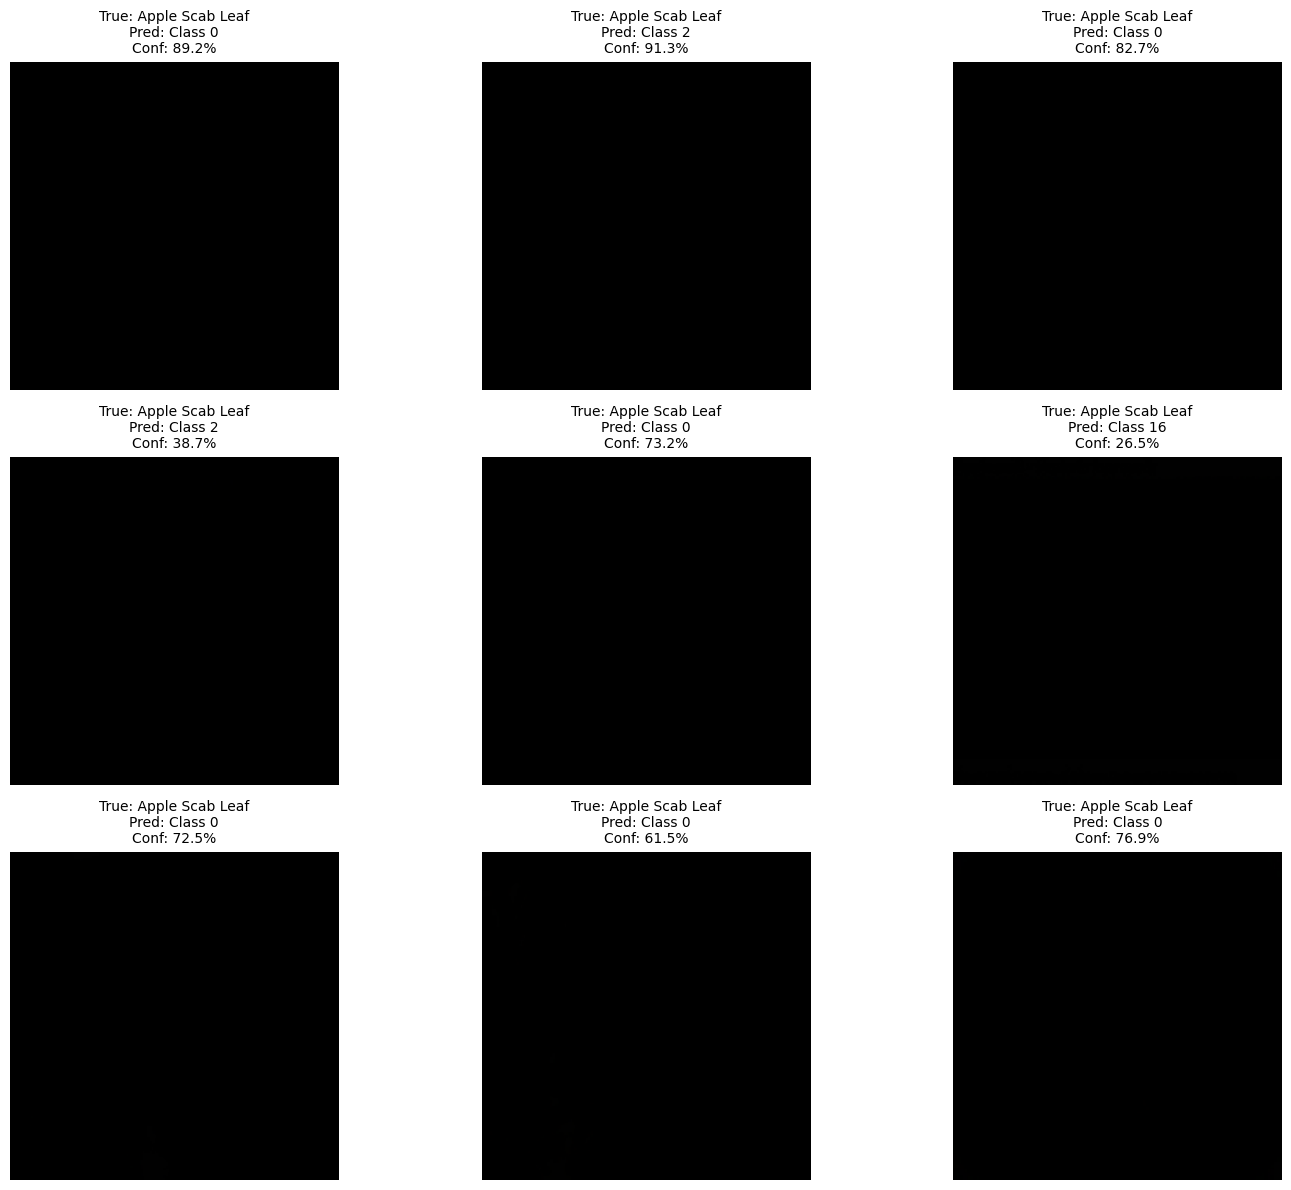


To correctly evaluate this model, you need to:
1. Identify the mapping between model output indices and your class names
2. The model predicts 28 classes, but your dataset has 27 classes
3. You'll need to find the original class mapping used during training

Analyzing dataset distribution...


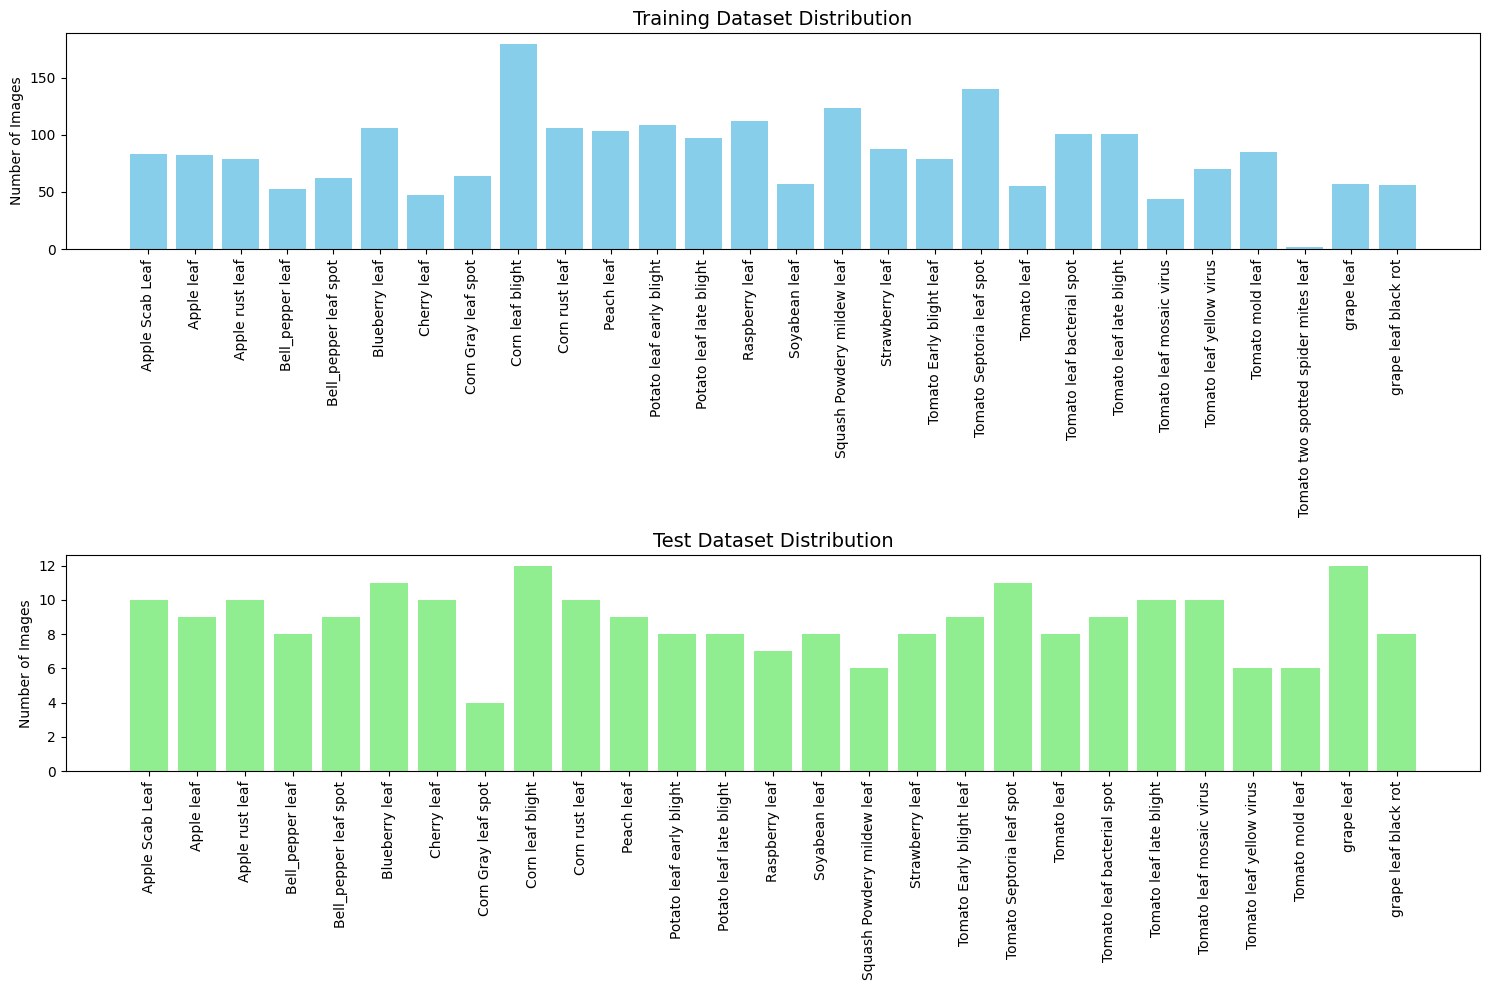


Model architecture layer analysis:

Last 5 layers of your model:


AttributeError: 'ReLU' object has no attribute 'output_shape'

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import time
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files, drive

print("\n" + "="*50)
print("🌿 PLANT DISEASE MODEL EVALUATION WITH AUTOMATIC CLASS DETECTION 🌿")
print("="*50 + "\n")

# 1. Load your model
MODEL_PATH = '/content/drive/MyDrive/PlantDiseaseProject/model/plant_disease_model.h5'
try:
    model = load_model(MODEL_PATH)
    print("✅ Model loaded successfully")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# 2. Get model information
IMAGE_SIZE = model.input_shape[1:3]  # Extract input shape from model
print(f"Model expects input images of size: {IMAGE_SIZE[0]}x{IMAGE_SIZE[1]}")
NUM_CLASSES = model.output_shape[1]  # Get number of output classes
print(f"Model predicts {NUM_CLASSES} different classes")

# 3. Set dataset paths
TRAIN_PATH = "/content/PlantDoc-Dataset/train"
TEST_PATH = "/content/PlantDoc-Dataset/test"

print(f"\nUsing training data from: {TRAIN_PATH}")
print(f"Using test data from: {TEST_PATH}")

# 4. Inspect actual dataset structure
def inspect_dataset():
    # List all classes in train directory
    train_classes = sorted([d for d in os.listdir(TRAIN_PATH) if os.path.isdir(os.path.join(TRAIN_PATH, d))])
    test_classes = sorted([d for d in os.listdir(TEST_PATH) if os.path.isdir(os.path.join(TEST_PATH, d))])

    print(f"\nFound {len(train_classes)} classes in training data:")
    for i, class_name in enumerate(train_classes):
        train_count = len([f for f in os.listdir(os.path.join(TRAIN_PATH, class_name))
                         if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        test_count = 0
        if class_name in test_classes:
            test_count = len([f for f in os.listdir(os.path.join(TEST_PATH, class_name))
                             if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

        print(f"{i}: {class_name} - {train_count} training, {test_count} test images")

    # Check if there's a mismatch between train and test classes
    missing_in_test = set(train_classes) - set(test_classes)
    if missing_in_test:
        print(f"\nWARNING: {len(missing_in_test)} classes in training data are missing from test data:")
        for cls in missing_in_test:
            print(f"  - {cls}")

    missing_in_train = set(test_classes) - set(train_classes)
    if missing_in_train:
        print(f"\nWARNING: {len(missing_in_train)} classes in test data are missing from training data:")
        for cls in missing_in_train:
            print(f"  - {cls}")

    return train_classes, test_classes

train_classes, test_classes = inspect_dataset()

# 5. Create a temporary model for inference with proper output shape
def create_adapter_model():
    print("\nCreating adapter model to handle class mismatch...")

    # Get the model without the final classification layer
    base_model = model

    # Check if we need to remove the last layer
    last_layer = base_model.layers[-1]
    if hasattr(last_layer, 'units') and last_layer.units == NUM_CLASSES:
        # Remove the last Dense layer
        x = base_model.layers[-2].output

        # Add a new classification layer matching the dataset classes
        new_output = tf.keras.layers.Dense(len(train_classes), activation='softmax')(x)

        # Create a new model
        adapted_model = tf.keras.Model(inputs=base_model.input, outputs=new_output)

        # Compile the model
        adapted_model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        print(f"Created adapter model with output shape {len(train_classes)} to match dataset")
        return adapted_model
    else:
        print("WARNING: Could not create adapter model - using original model")
        return model

# 6. Evaluate with modified approach
def evaluate_with_visualization():
    print("\nEvaluating model on test data...")

    # Create data generator
    datagen = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    # Load test data matching actual class names
    test_generator = datagen.flow_from_directory(
        TEST_PATH,
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Let's visualize some sample predictions even if we can't do full evaluation
    sample_images = []
    sample_labels = []

    # Get a batch of test images
    for images, labels in test_generator:
        sample_images = images[:9]  # Take up to 9 images
        sample_labels = labels[:9]
        break  # Just take the first batch

    # Get raw predictions from the model
    raw_predictions = model.predict(sample_images)

    # Visualize the samples with raw predictions
    plt.figure(figsize=(15, 12))

    for i in range(len(sample_images)):
        plt.subplot(3, 3, i+1)
        plt.imshow(sample_images[i]/255.0)  # Normalize for display

        # Find the top predicted class index
        pred_idx = np.argmax(raw_predictions[i])
        true_idx = np.argmax(sample_labels[i])

        # Get confidence
        confidence = raw_predictions[i][pred_idx] * 100

        # True class name from the dataset
        true_class = test_generator.class_indices
        true_class = {v: k for k, v in true_class.items()}  # Invert dictionary
        true_name = true_class[true_idx]

        # For predicted class, just use the index since we don't know the mapping
        title = f"True: {true_name}\nPred: Class {pred_idx}\nConf: {confidence:.1f}%"
        plt.title(title, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/sample_predictions.png', dpi=300)
    plt.show()

    print("\nTo correctly evaluate this model, you need to:")
    print("1. Identify the mapping between model output indices and your class names")
    print("2. The model predicts 28 classes, but your dataset has 27 classes")
    print("3. You'll need to find the original class mapping used during training")

    # Dataset distribution visualization
    print("\nAnalyzing dataset distribution...")
    class_counts = {'train': {}, 'test': {}}

    # Count samples per class
    for class_name in train_classes:
        train_dir = os.path.join(TRAIN_PATH, class_name)
        class_counts['train'][class_name] = len([f for f in os.listdir(train_dir)
                                              if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

    for class_name in test_classes:
        test_dir = os.path.join(TEST_PATH, class_name)
        class_counts['test'][class_name] = len([f for f in os.listdir(test_dir)
                                             if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

    # Plot distribution
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    plt.bar(class_counts['train'].keys(), class_counts['train'].values(), color='skyblue')
    plt.title('Training Dataset Distribution', fontsize=14)
    plt.xticks(rotation=90)
    plt.ylabel('Number of Images')

    plt.subplot(2, 1, 2)
    plt.bar(class_counts['test'].keys(), class_counts['test'].values(), color='lightgreen')
    plt.title('Test Dataset Distribution', fontsize=14)
    plt.xticks(rotation=90)
    plt.ylabel('Number of Images')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/class_distribution.png', dpi=300)
    plt.show()

    print("\nModel architecture layer analysis:")
    print("\nLast 5 layers of your model:")
    for i, layer in enumerate(model.layers[-5:]):
        print(f"Layer {len(model.layers)-5+i}: {layer.name}, Type: {type(layer).__name__}, "
              f"Output Shape: {layer.output_shape}")

# 7. Run the evaluation with visualizations
evaluate_with_visualization()

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("\nTo properly evaluate this model, you need to:")
print("1. Find the original class mapping used during training")
print("2. Create a custom class folder structure that matches the model's expected classes")
print("3. Or retrain/fine-tune the model on your current dataset structure")
print("="*50)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

print("\n" + "="*50)
print("🌿 PLANT DISEASE MODEL ACCURACY EVALUATION 🌿")
print("="*50 + "\n")

# 1. Load your model
MODEL_PATH = '/content/drive/MyDrive/PlantDiseaseProject/model/plant_disease_model.h5'
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully")

# 2. Set dataset paths
TRAIN_PATH = "/content/PlantDoc-Dataset/train"
TEST_PATH = "/content/PlantDoc-Dataset/test"
IMAGE_SIZE = model.input_shape[1:3]
print(f"Model input shape: {IMAGE_SIZE}")

# 3. Set up data generator with CORRECT preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# 4. Load test data
test_generator = datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 5. Custom accuracy evaluation to handle class mismatch
def evaluate_accuracy():
    # Store true labels and predictions
    all_true_labels = []
    all_predictions = []

    # Reset generator
    test_generator.reset()

    # Calculate steps needed to go through entire dataset
    steps = test_generator.samples // test_generator.batch_size + 1

    print(f"Evaluating model on {test_generator.samples} test images...")

    # For each batch
    for i in range(steps):
        try:
            # Get a batch of images and labels
            images, labels = test_generator.next()

            # Make predictions
            batch_predictions = model.predict(images, verbose=0)

            # Convert one-hot encoded labels to class indices
            true_indices = np.argmax(labels, axis=1)
            pred_indices = np.argmax(batch_predictions, axis=1)

            # Store results
            all_true_labels.extend(true_indices)
            all_predictions.extend(pred_indices)

        except StopIteration:
            break

    # Calculate overall accuracy
    correct_predictions = sum(1 for t, p in zip(all_true_labels, all_predictions)
                             if t == p)
    total_predictions = len(all_true_labels)
    accuracy = correct_predictions / total_predictions * 100

    print(f"\n===== MODEL ACCURACY =====")
    print(f"Overall Accuracy: {accuracy:.2f}%")
    print(f"Correctly classified: {correct_predictions} out of {total_predictions} images")

    # Get class mapping for better readability
    class_indices = test_generator.class_indices
    class_names = {v: k for k, v in class_indices.items()}

    # Create confusion matrix
    cm = confusion_matrix(all_true_labels, all_predictions)

    # Per-class accuracy
    class_accuracy = {}
    for i in range(len(cm)):
        if np.sum(cm[i]) > 0:  # Avoid division by zero
            class_accuracy[class_names[i]] = cm[i, i] / np.sum(cm[i]) * 100

    # Sort by accuracy (worst to best)
    sorted_class_accuracy = {k: v for k, v in sorted(class_accuracy.items(), key=lambda x: x[1])}

    print("\n===== PER-CLASS ACCURACY =====")
    for cls, acc in sorted_class_accuracy.items():
        print(f"{cls}: {acc:.2f}%")

    # Identify most confused classes
    class_confusion = {}
    for i in range(len(cm)):
        for j in range(len(cm)):
            if i != j and cm[i, j] > 0:
                key = f"{class_names[i]} → {class_names[j]}"
                class_confusion[key] = cm[i, j]

    # Get top confused classes
    top_confused = {k: v for k, v in sorted(class_confusion.items(), key=lambda x: x[1], reverse=True)[:10]}

    print("\n===== TOP 10 CONFUSED CLASSES =====")
    for confusion, count in top_confused.items():
        print(f"{confusion}: {count} images")

    # Plot confusion matrix (readable version for many classes)
    plt.figure(figsize=(16, 14))
    sns.heatmap(cm, annot=False, cmap='Blues')
    plt.xlabel('Predicted Class Index')
    plt.ylabel('True Class Index')
    plt.title('Confusion Matrix')
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/confusion_matrix.png', dpi=300)
    plt.show()

    # Return for further use
    return all_true_labels, all_predictions, class_names, accuracy

# 6. Execute evaluation
true_labels, predictions, class_names, overall_accuracy = evaluate_accuracy()

# 7. Visualize sample predictions with correct visualization
def visualize_predictions():
    # Reset generator to get fresh batch
    test_generator.reset()

    # Get a batch of images for visualization
    images, labels = next(test_generator)
    batch_predictions = model.predict(images, verbose=0)

    # Display sample predictions
    plt.figure(figsize=(15, 12))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i+1)

        # Proper normalization for display
        img = images[i].copy()

        # Convert back from preprocessing for display
        # This handles the mobilenetv2 preprocessing properly
        img = img / 2.0 + 0.5
        img = np.clip(img, 0, 1)

        plt.imshow(img)

        # Get class information
        true_idx = np.argmax(labels[i])
        pred_idx = np.argmax(batch_predictions[i])
        confidence = batch_predictions[i][pred_idx] * 100

        # Get class names
        true_name = class_names.get(true_idx, f"Class {true_idx}")
        pred_name = class_names.get(pred_idx, f"Class {pred_idx}")

        # Color-code correct/incorrect predictions
        color = 'green' if true_idx == pred_idx else 'red'

        title = f"True: {true_name}\nPred: {pred_name}\nConf: {confidence:.1f}%"
        plt.title(title, fontsize=10, color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PlantDiseaseProject/evaluation/sample_predictions.png', dpi=300)
    plt.show()

# 8. Show sample predictions
visualize_predictions()

print("\n" + "="*50)
print(f"MODEL EVALUATION COMPLETE: {overall_accuracy:.2f}% Accuracy")
print("All visualizations have been saved to your Google Drive")
print("="*50)


🌿 PLANT DISEASE MODEL ACCURACY EVALUATION 🌿



✅ Model loaded successfully
Model input shape: (224, 224)
Found 236 images belonging to 27 classes.
Evaluating model on 236 test images...


AttributeError: 'DirectoryIterator' object has no attribute 'next'